In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows = range(20), skipfooter = 2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df.shape

(195, 43)

In [4]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace = True)

In [5]:
df.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace = True)

In [6]:
df.columns = list(map(str, df.columns))

In [7]:
df.set_index('Country', inplace = True)


In [8]:
years = list(map(str, range(1980, 2014)))

In [9]:
df['Total'] = df[years].sum(axis = 1)

In [10]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [11]:
df.shape

(195, 38)

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [13]:
matplotlib.style.use('Solarize_Light2')

In [14]:
df1 = df.loc[['Denmark', 'Norway', 'Sweden'], :]
df1.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [15]:
df2 = df.loc[['Denmark', 'Norway', 'Sweden']]
df2.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [16]:
totals = df1['Total'].sum()
proportions = df1['Total'] / totals
proportions = pd.DataFrame({'Proportion': proportions})

In [17]:
proportions

,Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [18]:
w, l = 10, 40
area = w*l
print(area)

400


In [19]:
proportions['NumTiles'] = (proportions['Proportion'] * area).round().astype(int)
proportions

,Proportion,NumTiles
Country,,
Denmark,0.322557,129
Norway,0.192409,77
Sweden,0.485034,194


In [20]:
waffle_chart = np.zeros((w, l), dtype = np.uint)
category_index = 0
tile_index = 0

In [21]:
for col in range(l):
    for row in range(w):
        tile_index +=1
        if tile_index > proportions['NumTiles'].iloc[0:category_index].sum():
            category_index +=1
        waffle_chart[row, col] = category_index
print("Done")

Done


In [22]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 936x360 with 0 Axes>

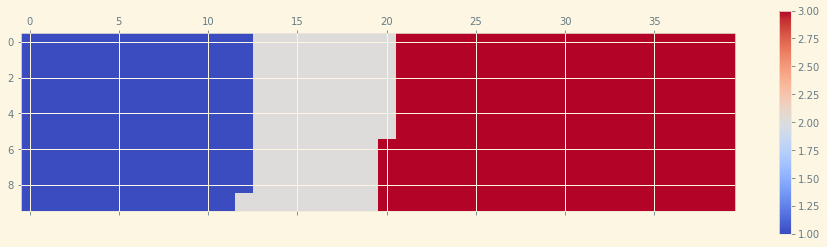

In [23]:
fig = plt.figure(figsize = (13, 5))
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()

<Figure size 936x360 with 0 Axes>

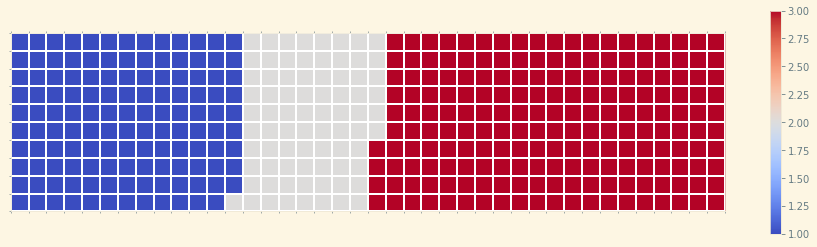

In [24]:
fig = plt.figure(figsize = (13, 5))
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5, (l), 1), minor = True)
ax.set_yticks(np.arange(-.5, (w), 1), minor = True)
ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)
plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 936x360 with 0 Axes>

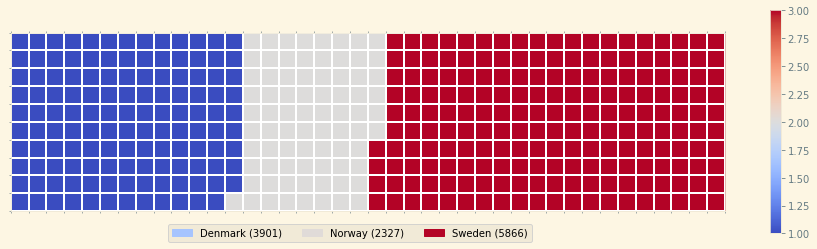

In [25]:
fig = plt.figure(figsize = (13, 5))
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5, (l), 1), minor = True)
ax.set_yticks(np.arange(-.5, (w), 1), minor = True)
ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)
plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df1['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend
legend_handles = []
for i, category in enumerate(df1.index.values):
    label_str = category + ' (' + str(df1['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color = color_val, label = label_str))

plt.legend(handles = legend_handles,
    loc = 'lower center', ncol = len(df1.index.values), bbox_to_anchor = (0, -0.2, 0.95, .1))


plt.show()

In [26]:
!pip install pywaffle

In [27]:
from pywaffle import Waffle

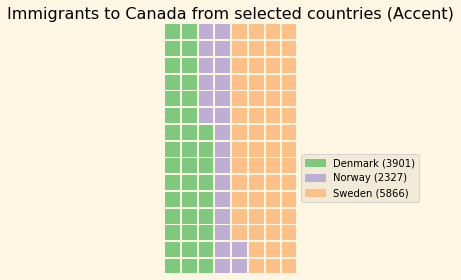

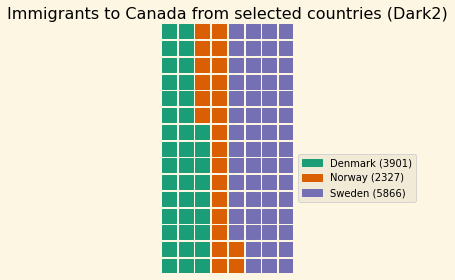

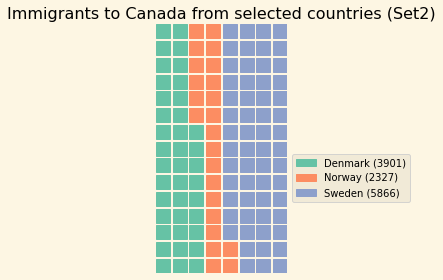

In [28]:
#Create waffle chart using pywaffle instead of manually
dict1 = {}
for i, category in enumerate(df1.index.values):
    dict1[category] = df1['Total'][i]
    i+=1

list = []
for key in dict1.keys():
    list.append(key)

#Accent, Dark2, Set2 are nice colormaps

colorlist = ['Accent', 'Dark2', 'Set2']
#for color in plt.colormaps():
for color in colorlist:
    try:
        fig = plt.figure(FigureClass= Waffle, rows = 15, columns = 8, values = dict1, 
            labels = [f"{k} ({int(v)})" for k, v in dict1.items()],
            legend = {'loc': 'upper left', 'bbox_to_anchor': (1, .5)}, title = {'label': f'Immigrants to Canada from selected countries ({color})'}, 
            cmap_name = color
            )
        plt.show()
    except:
        pass


In [29]:
df1.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [30]:
dict1 = {}
for i, category in enumerate(df1.index.values):
    dict1[category] = df1['Total'][i]
    i+=1
dict1

{'Denmark': 3901, 'Norway': 2327, 'Sweden': 5866}

In [31]:
#Custom waffle chart function:

def create_waffle_chart(categories, values, height, width, colormap, dfname, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (dfname.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [32]:
width = 40 # width of chart
height = 10 # height of chart

categories = df1.index.values # categories
values = df1['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

In [33]:
print(values)

Country
Denmark    3901
Norway     2327
Sweden     5866
Name: Total, dtype: int64


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

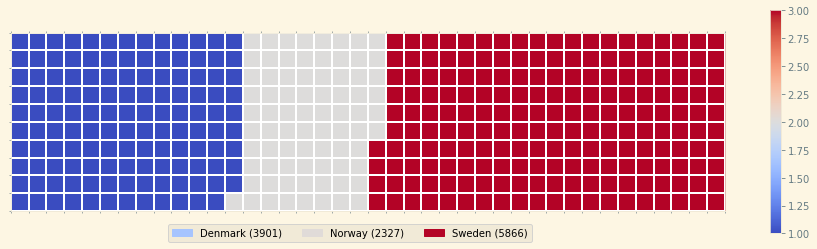

In [34]:
create_waffle_chart(categories, values, height, width, colormap, df1)

In [35]:
import seaborn as sns
import pandas as pd

In [36]:
df_tot = pd.DataFrame(df[years].sum(axis = 0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['year', 'total']

In [37]:
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<AxesSubplot:xlabel='year', ylabel='total'>

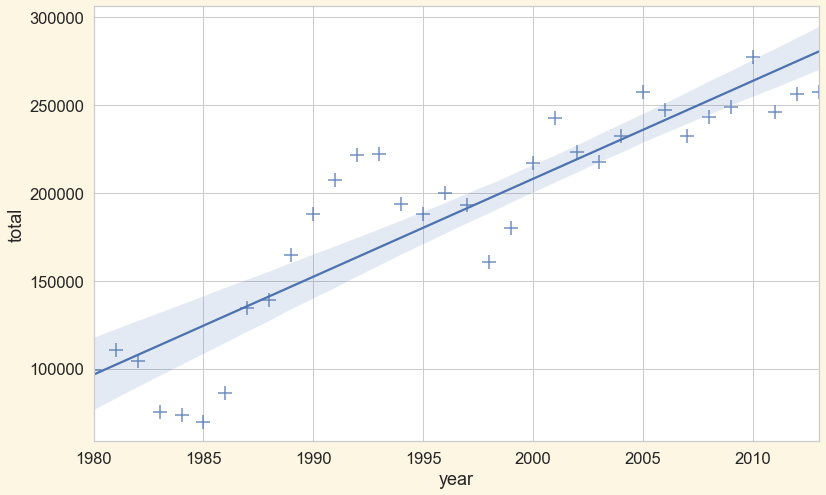

In [38]:
plt.figure(figsize = (13,8))
sns.set (font_scale = 1.5)
sns.set_style('whitegrid')
sns.regplot(x = 'year', y = 'total', data = df_tot, marker = "+", scatter_kws={'s': 200})

In [39]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [40]:
df_tot2 = pd.DataFrame(df.loc[['Denmark', 'Sweden', 'Norway'],years].sum(axis = 0))
df_tot2.index = map(float, df_tot2.index)
df_tot2.reset_index(inplace = True)
df_tot2.columns = ['year', 'total']
df_tot2['year'] = df_tot2['year'].astype(int)

In [41]:
df_tot2.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


<AxesSubplot:xlabel='year', ylabel='total'>

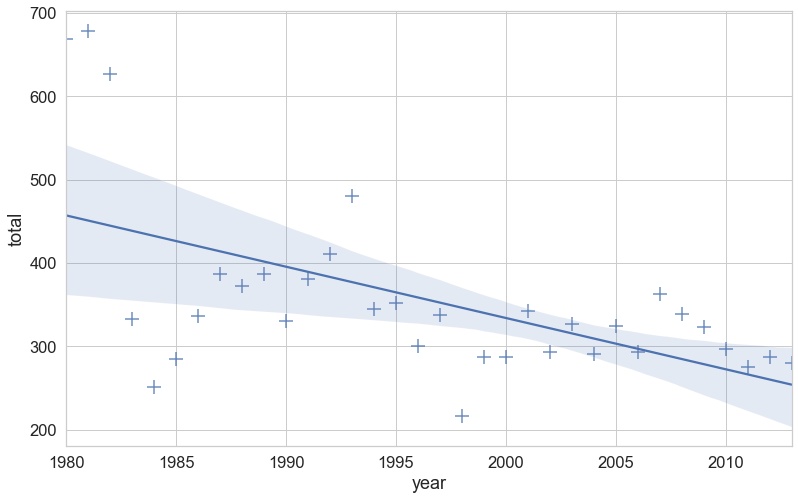

In [42]:
plt.figure(figsize = (13,8))
sns.set (font_scale = 1.5)
sns.set_style('whitegrid')
sns.regplot(x = 'year', y = 'total', data = df_tot2, marker = "+", scatter_kws={'s': 200})

In [44]:
!pip3 install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'done'


In [45]:
from wordcloud import WordCloud, STOPWORDS

In [47]:
import urllib

# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [48]:
stopwords = set(STOPWORDS)

In [49]:
print(stopwords)

{"where's", 'both', 'whom', 'in', "it's", 'him', "wasn't", 'at', 'few', 'since', 'r', 'below', "they'd", 'yourselves', "let's", 'against', 'had', "you'd", 'however', 'has', 'me', 'under', 'above', 'are', "he'll", 'get', 'nor', 'is', 'so', 'after', "he'd", 'theirs', "they'll", 'otherwise', "who's", 'to', 'about', "can't", 'would', 'you', 'not', 'an', 'our', 'off', 'between', "weren't", 'this', 'when', 'shall', 'before', 'own', 'but', 'be', 'am', 'her', "that's", 'he', "why's", "they're", 'do', 'by', 'than', 'with', 'why', 'for', "what's", 'on', 'ours', "he's", "here's", 'as', "i'm", "shouldn't", "you'll", 'over', 'no', 'www', 'once', "didn't", "how's", 'into', 'what', 'more', 'else', 'from', 'itself', 'could', "we're", 'did', 'same', "she'll", 'its', 'was', 'up', 'k', 'only', 'of', 'some', "hadn't", 'all', "i'll", "mustn't", "she's", 'most', 'further', 'those', 'also', "won't", 'other', 'were', 'during', 'having', 'any', 'there', 'have', 'while', 'because', "we'll", "hasn't", 'very', 'w

In [50]:
alice_wc = WordCloud(background_color='white', max_words = 2000, stopwords = stopwords)
alice_wc.generate(alice_novel)

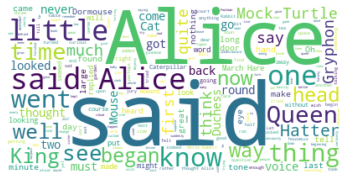

In [53]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

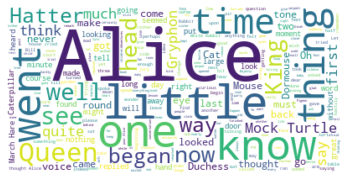

In [54]:
stopwords.add('said')
alice_wc.generate(alice_novel)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

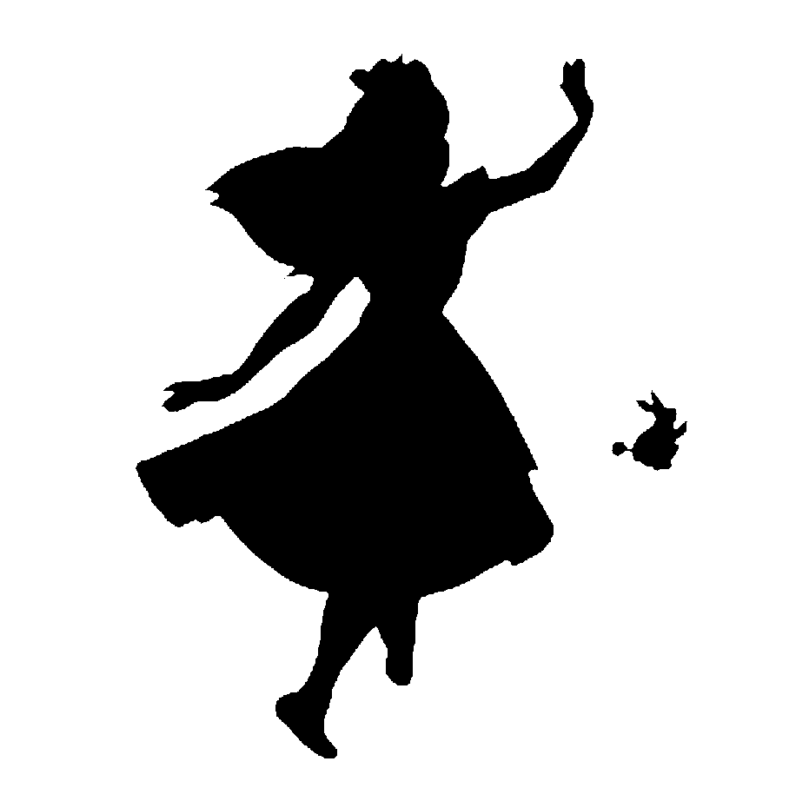

In [56]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

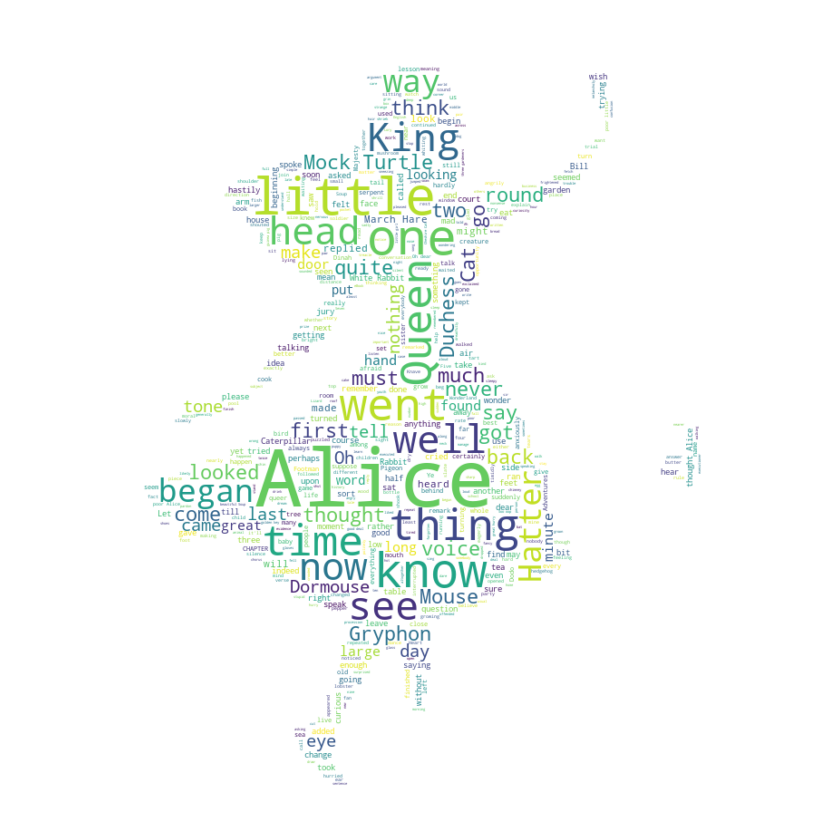

In [58]:
alice_wc = WordCloud(background_color='white', max_words = 2000, stopwords = stopwords, mask = alice_mask)
alice_wc.generate(alice_novel)
fig = plt.figure(figsize = (15, 15))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [60]:
max_words = 100
total_immigration = df['Total'].sum()
word_string = '' 
for country in df.index.values:
    if country.count(" ") ==0:
        repeat_num_times = int(df.loc[country, 'Total']/ total_immigration * max_words)
        word_string = word_string + ((country + ' ')*repeat_num_times)
word_string

'Algeria Bangladesh China China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India India Iraq Israel Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania '

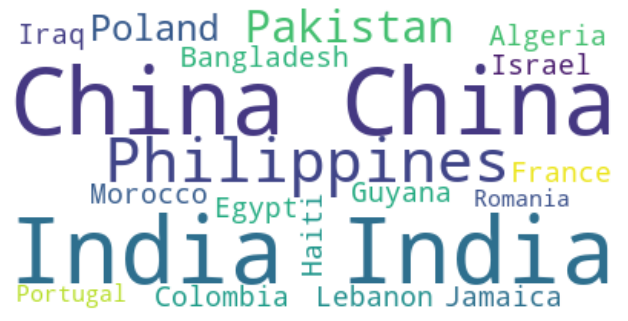

In [65]:
wordcloud2 = WordCloud(background_color='white').generate(word_string)
plt.figure(figsize = (11, 6))
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.show()